In [3]:
import pandas as pd

# Load raw data
df = pd.read_csv("communities+and+crime/communities.data", header=None, na_values=["?"])

# Load column names from .names file
with open("communities+and+crime/communities.names") as f:
    lines = f.readlines()
column_names = [line.split()[1] for line in lines if line.startswith("@attribute")]
df.columns = column_names[:df.shape[1]]

# Drop the first 5 columns
df = df.iloc[:, 5:]

# Keep only percentage-based columns + target
df = df[[col for col in df.columns if ('pct' in col.lower()) or col == 'ViolentCrimesPerPop']]

# Save the cleaned dataset
df.to_csv("communities_percentages_cleaned.csv", index=False)

print(f"✅ Cleaned dataset saved. Shape: {df.shape}")


✅ Cleaned dataset saved. Shape: (1994, 74)


In [5]:
import pandas as pd

# Read the raw data as strings
df = pd.read_csv("communities+and+crime/communities.data", header=None, na_values='?')

print(f"Shape: {df.shape}\n")
print(df[:5])  # Preview the first 5 rows #violentCrimeRate

Shape: (1994, 128)

   0     1        2                    3    4     5     6     7     8     9    \
0    8   NaN      NaN         Lakewoodcity    1  0.19  0.33  0.02  0.90  0.12   
1   53   NaN      NaN          Tukwilacity    1  0.00  0.16  0.12  0.74  0.45   
2   24   NaN      NaN         Aberdeentown    1  0.00  0.42  0.49  0.56  0.17   
3   34   5.0  81440.0  Willingborotownship    1  0.04  0.77  1.00  0.08  0.12   
4   42  95.0   6096.0    Bethlehemtownship    1  0.01  0.55  0.02  0.95  0.09   

   ...   118   119   120   121   122  123  124   125   126   127  
0  ...  0.12  0.26  0.20  0.06  0.04  0.9  0.5  0.32  0.14  0.20  
1  ...  0.02  0.12  0.45   NaN   NaN  NaN  NaN  0.00   NaN  0.67  
2  ...  0.01  0.21  0.02   NaN   NaN  NaN  NaN  0.00   NaN  0.43  
3  ...  0.02  0.39  0.28   NaN   NaN  NaN  NaN  0.00   NaN  0.12  
4  ...  0.04  0.09  0.02   NaN   NaN  NaN  NaN  0.00   NaN  0.03  

[5 rows x 128 columns]


In [8]:
import pandas as pd

# Load raw data
df_cleaned = pd.read_csv("communities+and+crime/communities.data", header=None, na_values=["?"])

# Step 1: Assign real column names
with open("communities+and+crime/communities.names") as f:
    lines = f.readlines()
column_names = [line.split()[1] for line in lines if line.startswith("@attribute")]
df_cleaned.columns = column_names[:df_cleaned.shape[1]]

# Step 2: Drop first 5 columns by name, preserving the target if it's among them
first_5_cols = df_cleaned.columns[:5].tolist()
if 'ViolentCrimesPerPop' in first_5_cols:
    first_5_cols.remove('ViolentCrimesPerPop')

df_final = df_cleaned.drop(columns=first_5_cols)

# Step 3: Drop columns with >50% missing values — EXCEPT the target
nan_threshold = 0.5 * len(df_final)
nan_cols = df_final.columns[df_final.isna().sum() > nan_threshold].tolist()
if 'ViolentCrimesPerPop' in nan_cols:
    nan_cols.remove('ViolentCrimesPerPop')

df_final = df_final.drop(columns=nan_cols)

# Step 4: Keep only percentage-based columns + target
percentage_cols = [col for col in df_final.columns if 'pct' in col.lower()]
if 'ViolentCrimesPerPop' in df_final.columns:
    percentage_cols.append('ViolentCrimesPerPop')

df_final = df_final[percentage_cols]

print(f"✅ Final shape with only percentage features and target: {df_final.shape}")
df_final.head()



✅ Final shape with only percentage features and target: (1994, 68)


,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,pctUrban,pctWWage,...,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,1.0,0.72,...,0.46,0.25,0.12,0.42,0.50,0.51,0.64,0.20,0.32,0.20
1,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,1.0,0.72,...,0.32,0.18,0.21,0.50,0.34,0.60,0.52,0.45,0.00,0.67
2,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.0,0.58,...,0.39,0.28,0.14,0.49,0.54,0.67,0.56,0.02,0.00,0.43
3,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,1.0,0.89,...,0.51,0.47,0.19,0.30,0.73,0.64,0.65,0.28,0.00,0.12
4,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,0.9,0.72,...,0.51,0.21,0.11,0.72,0.64,0.61,0.53,0.02,0.00,0.03


In [9]:
df_final = df_final.apply(pd.to_numeric, errors='coerce')

In [10]:
missing_cols = df_final.columns[df_final.isnull().any()]
print("Columns with missing values:")
print(missing_cols.tolist())

Columns with missing values:
[]


In [11]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Only use numeric columns
df_numeric = df_final.select_dtypes(include=[np.number])

for col in df_numeric.columns[df_numeric.isna().any()]:
    not_null = df_numeric[df_numeric[col].notnull()]
    is_null = df_numeric[df_numeric[col].isnull()]

    if len(not_null) < 50 or len(is_null) == 0:
        print(f"⛔ Skipping '{col}' due to insufficient data.")
        continue

    X_train = not_null.drop(columns=[col]).fillna(not_null.mean())
    y_train = not_null[col]
    X_pred = is_null.drop(columns=[col]).fillna(not_null.mean())

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_pred)

    df.loc[df_final[col].isnull(), col] = y_pred
    print(f"✅ Filled {len(y_pred)} missing values in '{col}' using Random Forest.")


In [12]:
missing = df_final.isnull().sum().sum()

if missing == 0:
    print("✅ No missing values remain in the dataset.")
else:
    print(f"⚠️ There are still {missing} missing values in the dataset.")

✅ No missing values remain in the dataset.


In [22]:
df_final.to_excel("communities+and+crime/kinda_cleaned.xlsx", index=False)

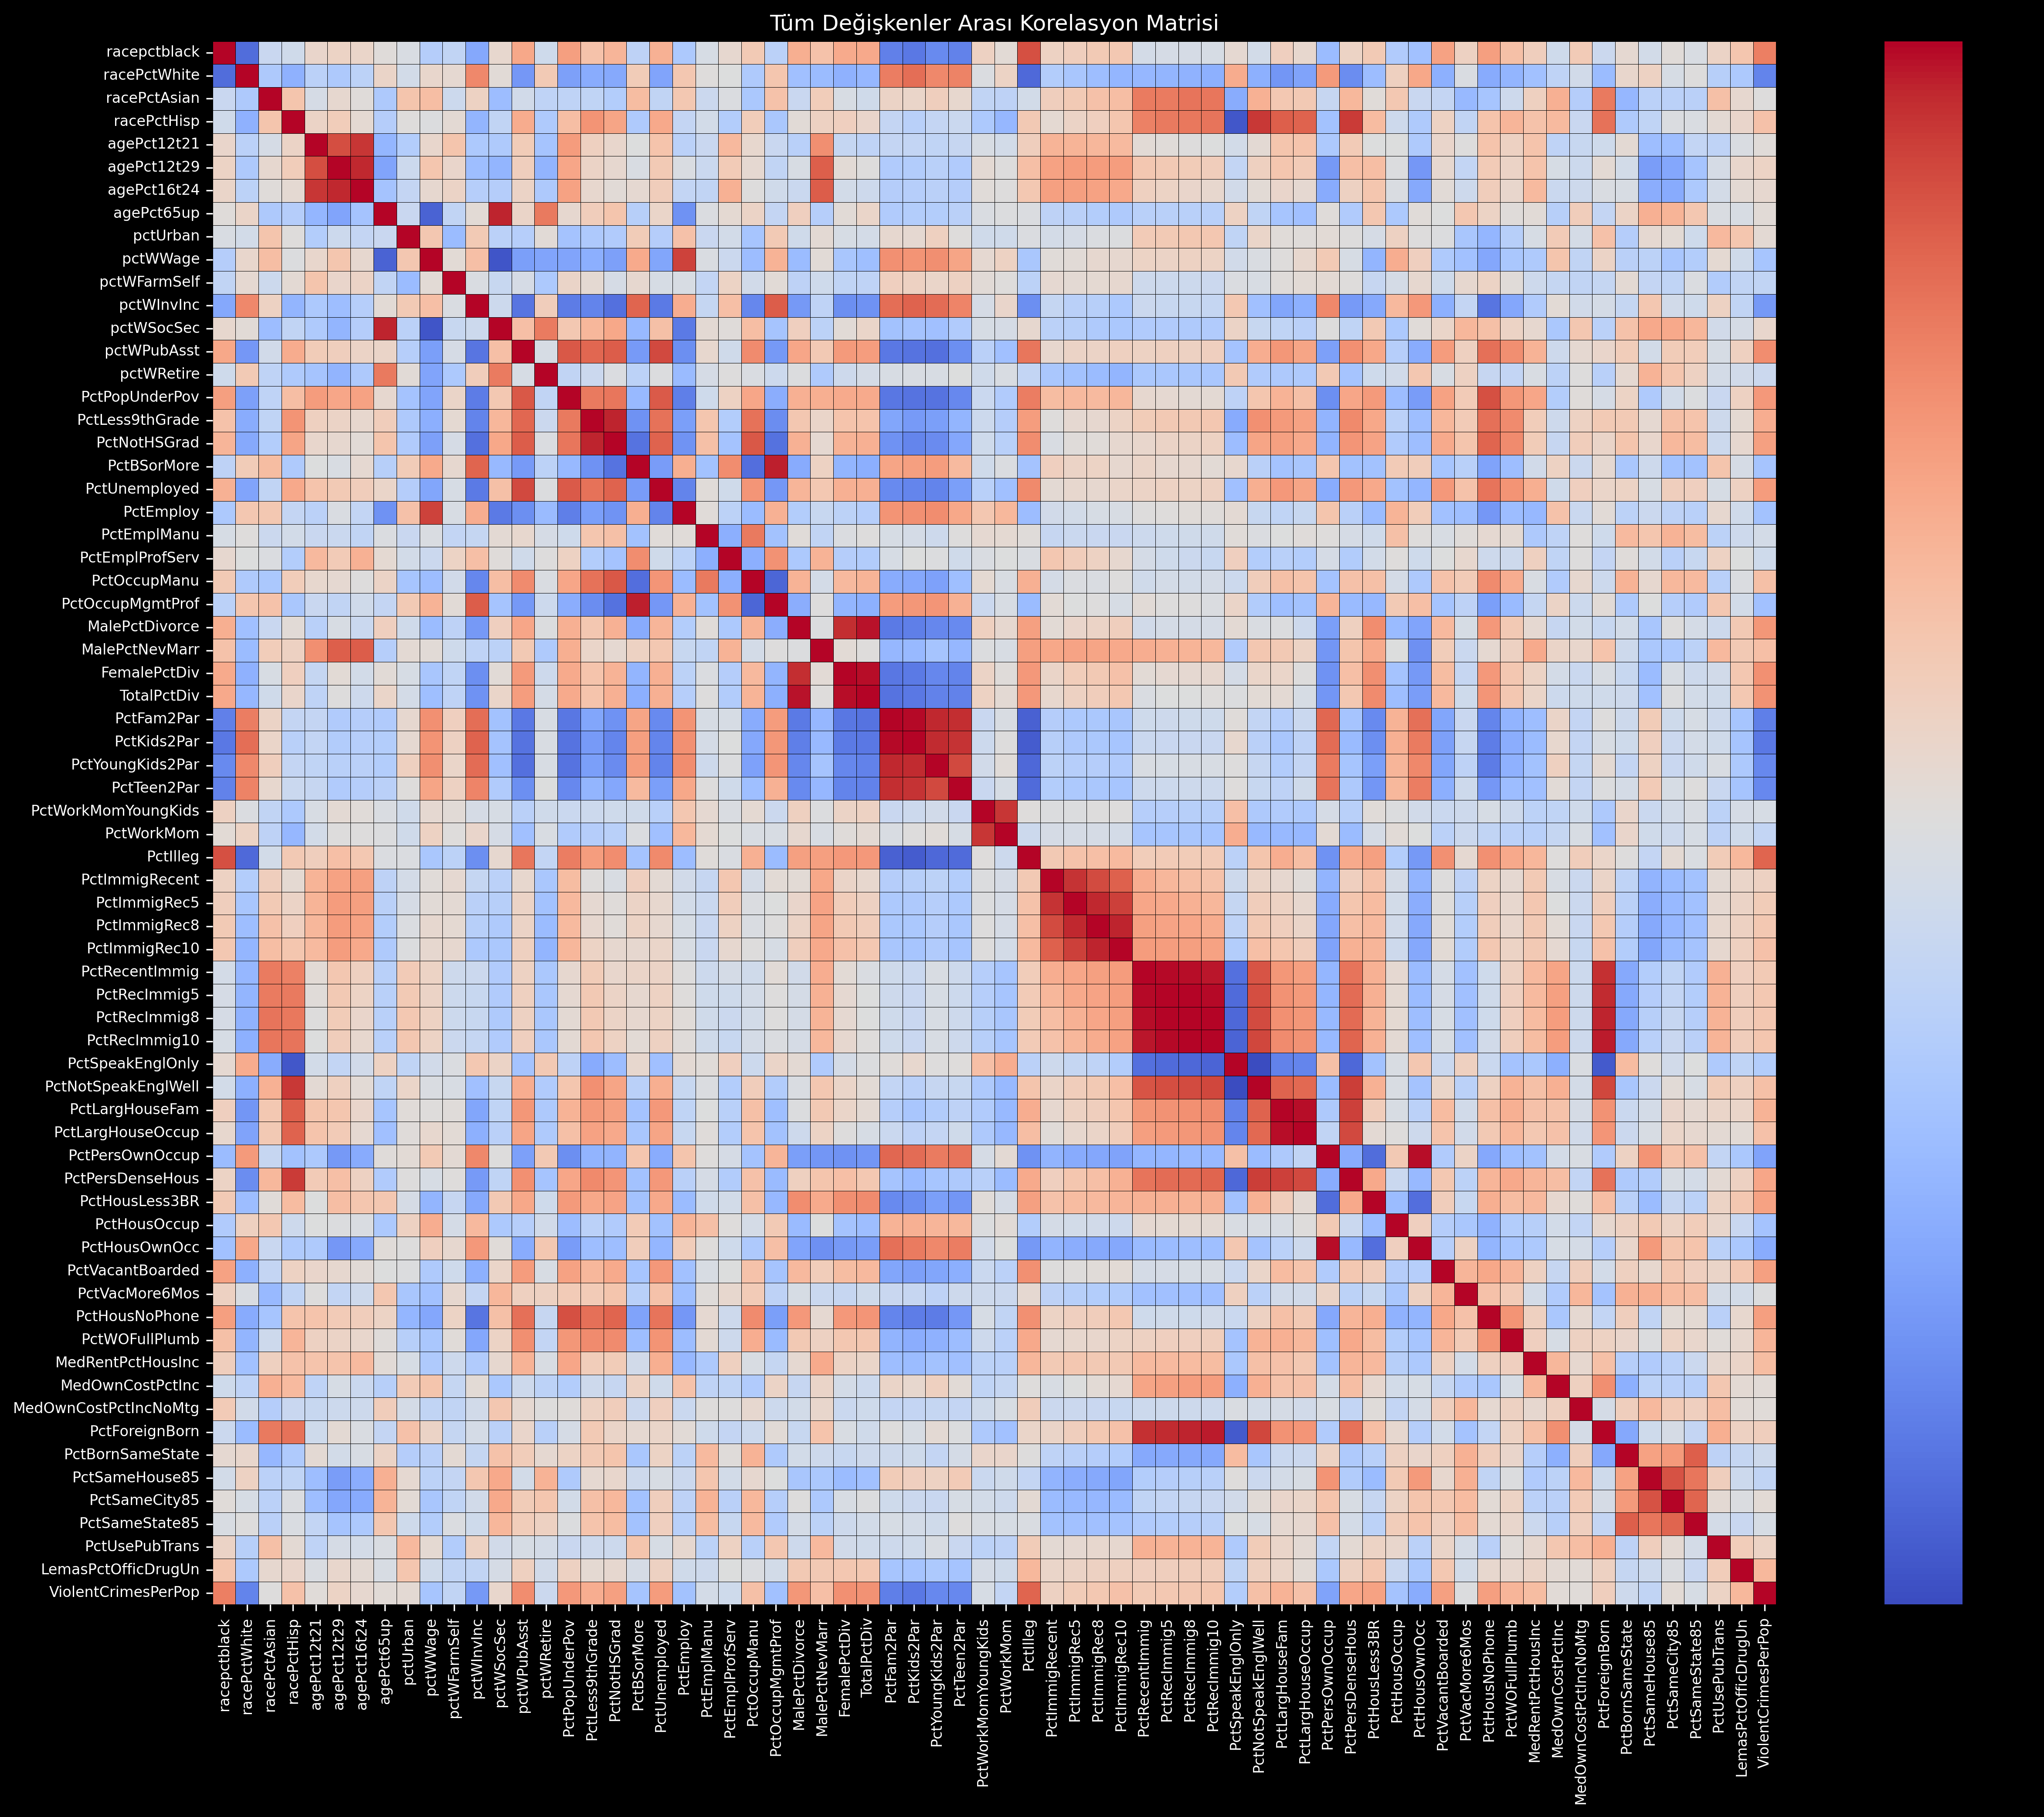

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Korelasyon matrisi
full_corr = df_final.corr(numeric_only=True)

# High-resolution figure with black background
fig, ax = plt.subplots(figsize=(18, 14), dpi=300, facecolor='black')

sns.heatmap(
    full_corr,
    cmap='coolwarm',
    cbar=True,
    ax=ax,
    linewidths=0.2,
    linecolor='black',
    square=True,
    xticklabels=True,
    yticklabels=True
)

# Siyah zemin ve beyaz yazılar
ax.set_facecolor('black')
ax.tick_params(colors='white', labelsize=8)
plt.title("Tüm Değişkenler Arası Korelasyon Matrisi", color='white')
# figures klasörünü oluştur
os.makedirs("figures", exist_ok=True)

plt.tight_layout()
plt.savefig("figures/correlation_matrix.png", facecolor=fig.get_facecolor())
plt.show()

# Excel çıktısı
full_corr.to_excel("communities+and+crime/correlation_rates.xlsx")


['racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'PctIlleg', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'PctHousOccup', 'PctHousOwnOcc', 'PctVacantBoarded', 'PctVacMore6Mos', 'PctHousNoPhone', 'PctWOFullPlumb', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCos

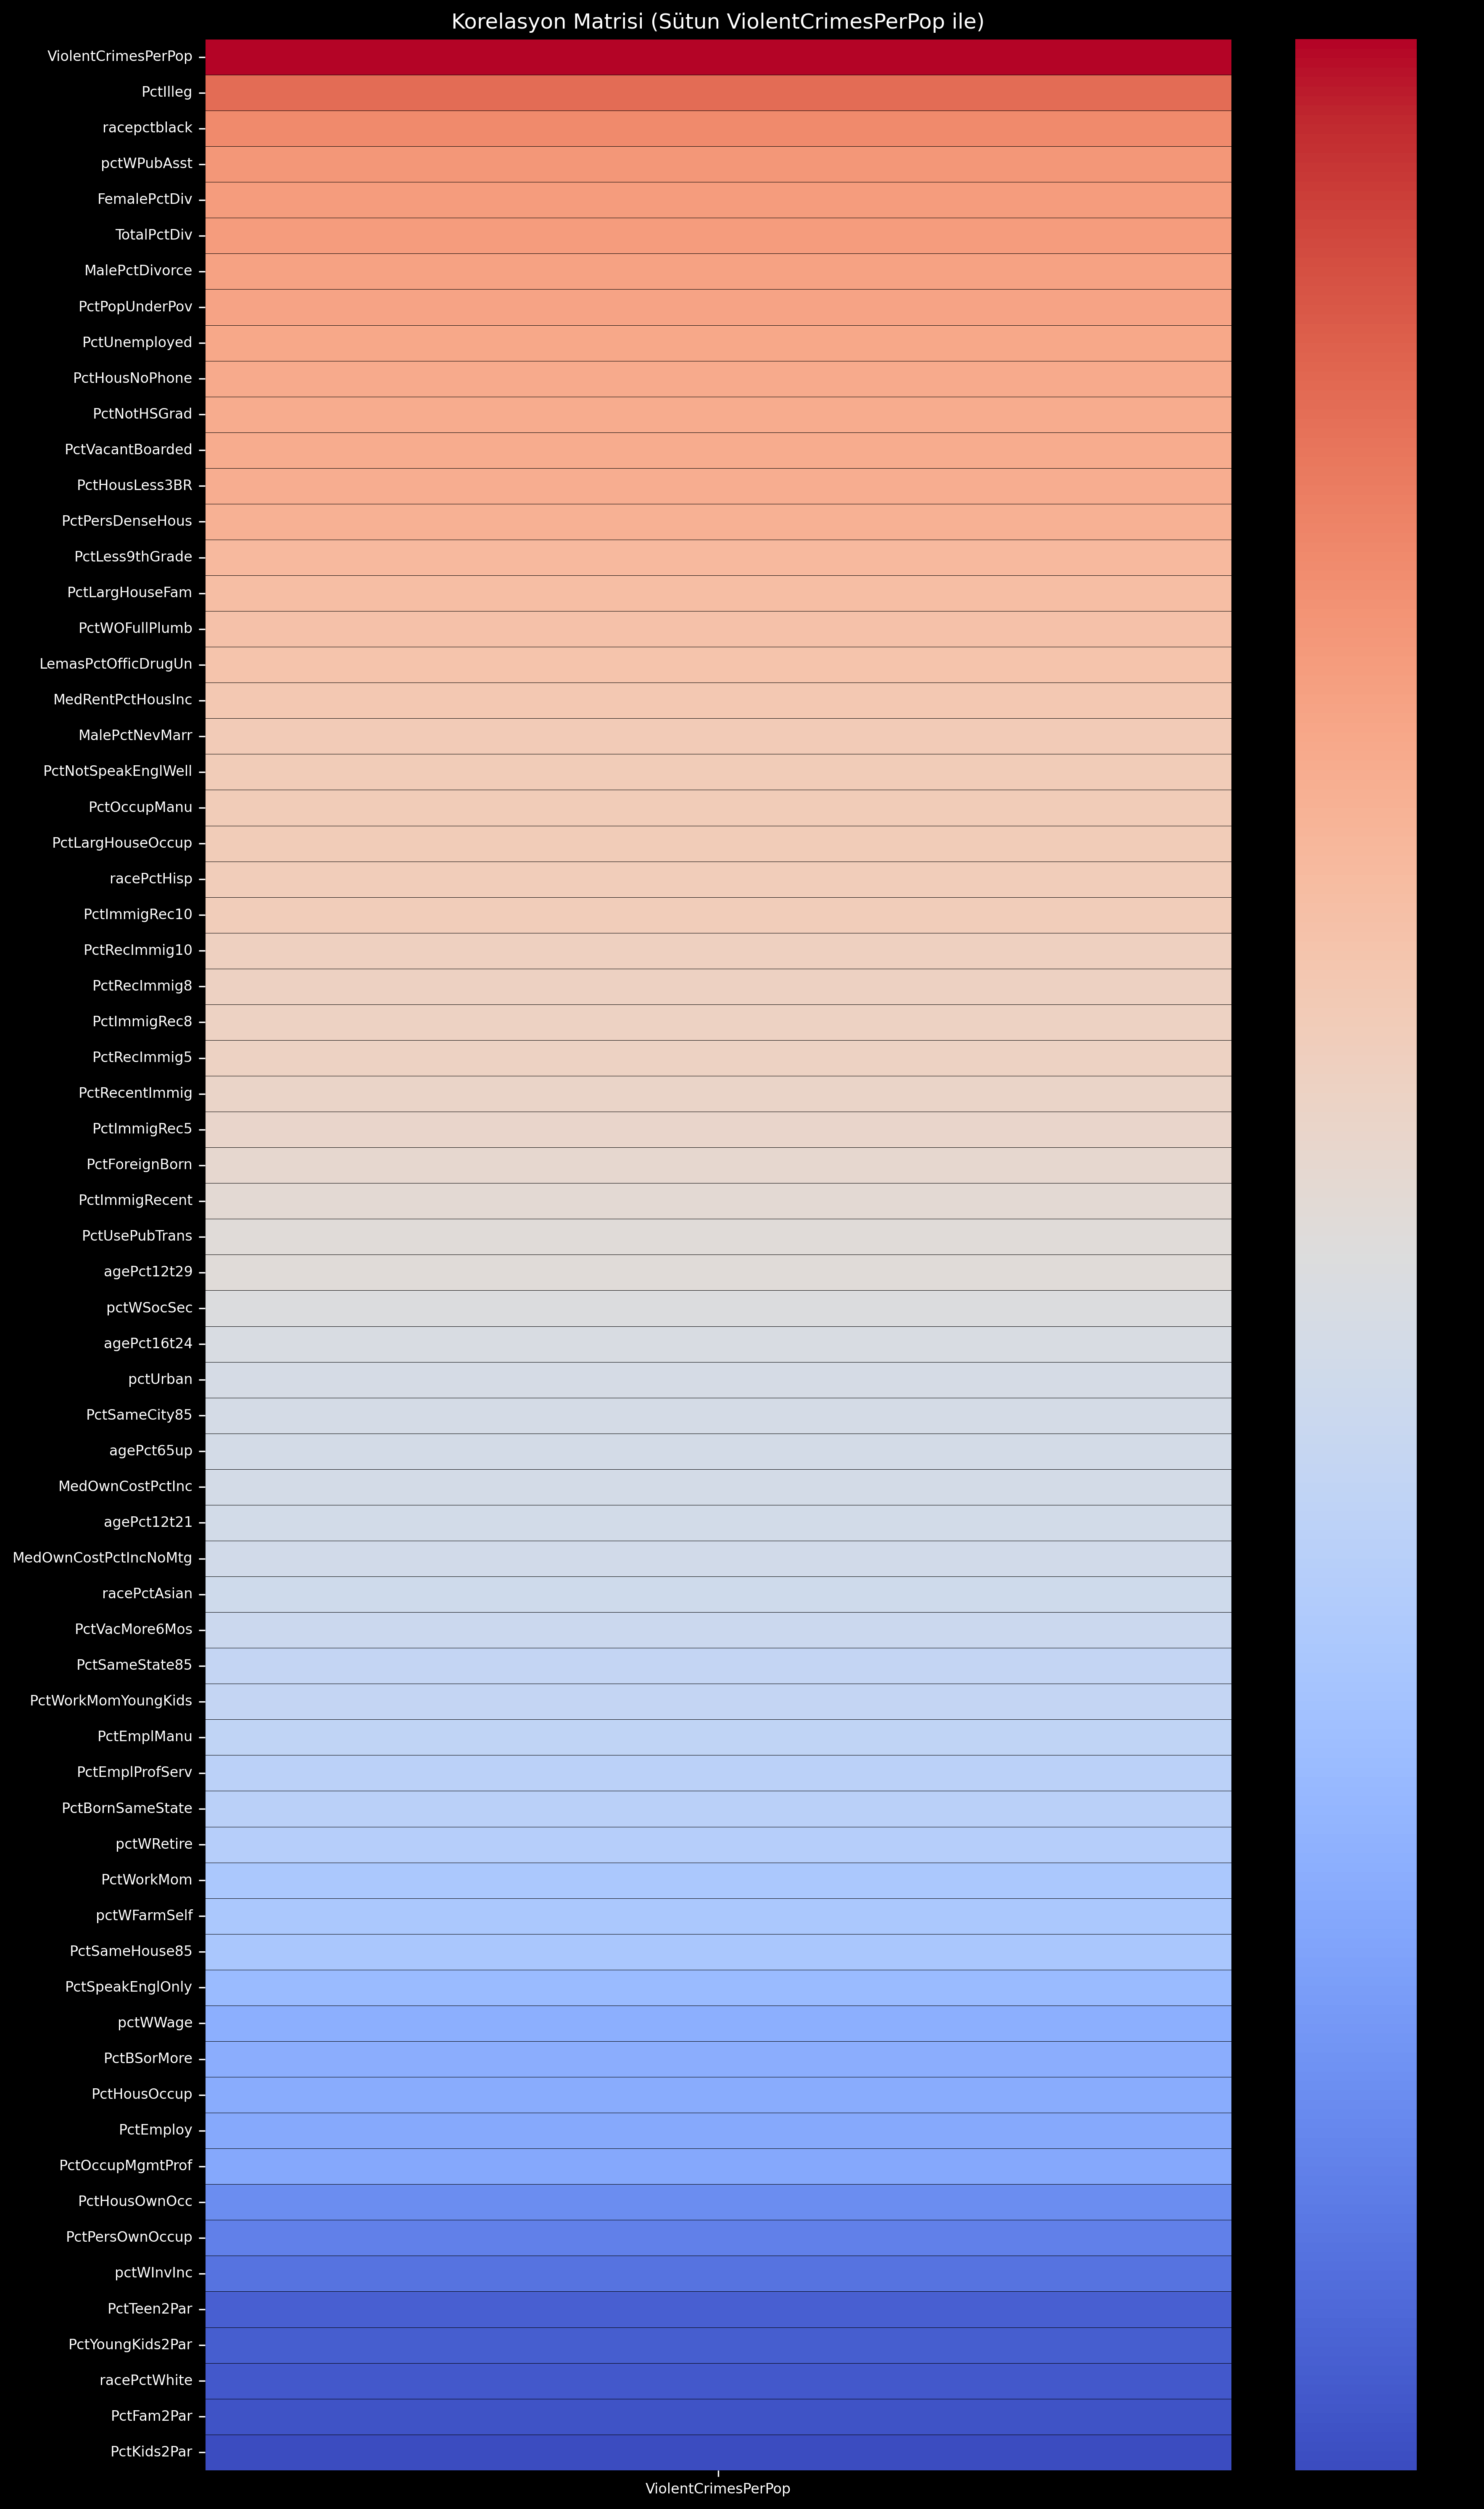

In [42]:
# Korelasyon matrisi (sayısal sütunlar)
corr_matrix = df_final.corr(numeric_only=True)
print(df_final.columns.tolist())
# 100. sütun baz alınarak korelasyonlar
target_col = 'ViolentCrimesPerPop'
if target_col not in corr_matrix.columns:
    corr_matrix[target_col] = df_final[target_col]
    
target_corr = corr_matrix[[target_col]].sort_values(by=target_col, ascending=False)

# Visualization
fig, ax = plt.subplots(figsize=(12, 20), dpi=300, facecolor='black')

sns.heatmap(
    target_corr,
    cmap='coolwarm',
    annot=False,
    cbar=True,
    ax=ax,
    linewidths=0.2,
    linecolor='black',
    xticklabels=True,
    yticklabels=True
)

ax.set_facecolor('black')
ax.tick_params(colors='white', labelsize=8)
plt.title(f"Korelasyon Matrisi (Sütun {target_col} ile)", color='white')

plt.tight_layout()
plt.savefig("figures/correlation_matrix_toCrimeRates.png", facecolor=fig.get_facecolor())
plt.show()

# Excel çıktısı
target_corr.to_excel("communities+and+crime/correlation_to_column100.xlsx")


C:\Users\juanr\AppData\Local\Temp\ipykernel_26736\862273894.py:42: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\juanr\AppData\Local\Temp\ipykernel_26736\862273894.py:43: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.savefig("figures/correlation_graph.png", dpi=300)
C:\Users\juanr\OneDrive\Escritorio\VERI BILIMINE GIRIS\PROJE\communitiesAndCrimeProject\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


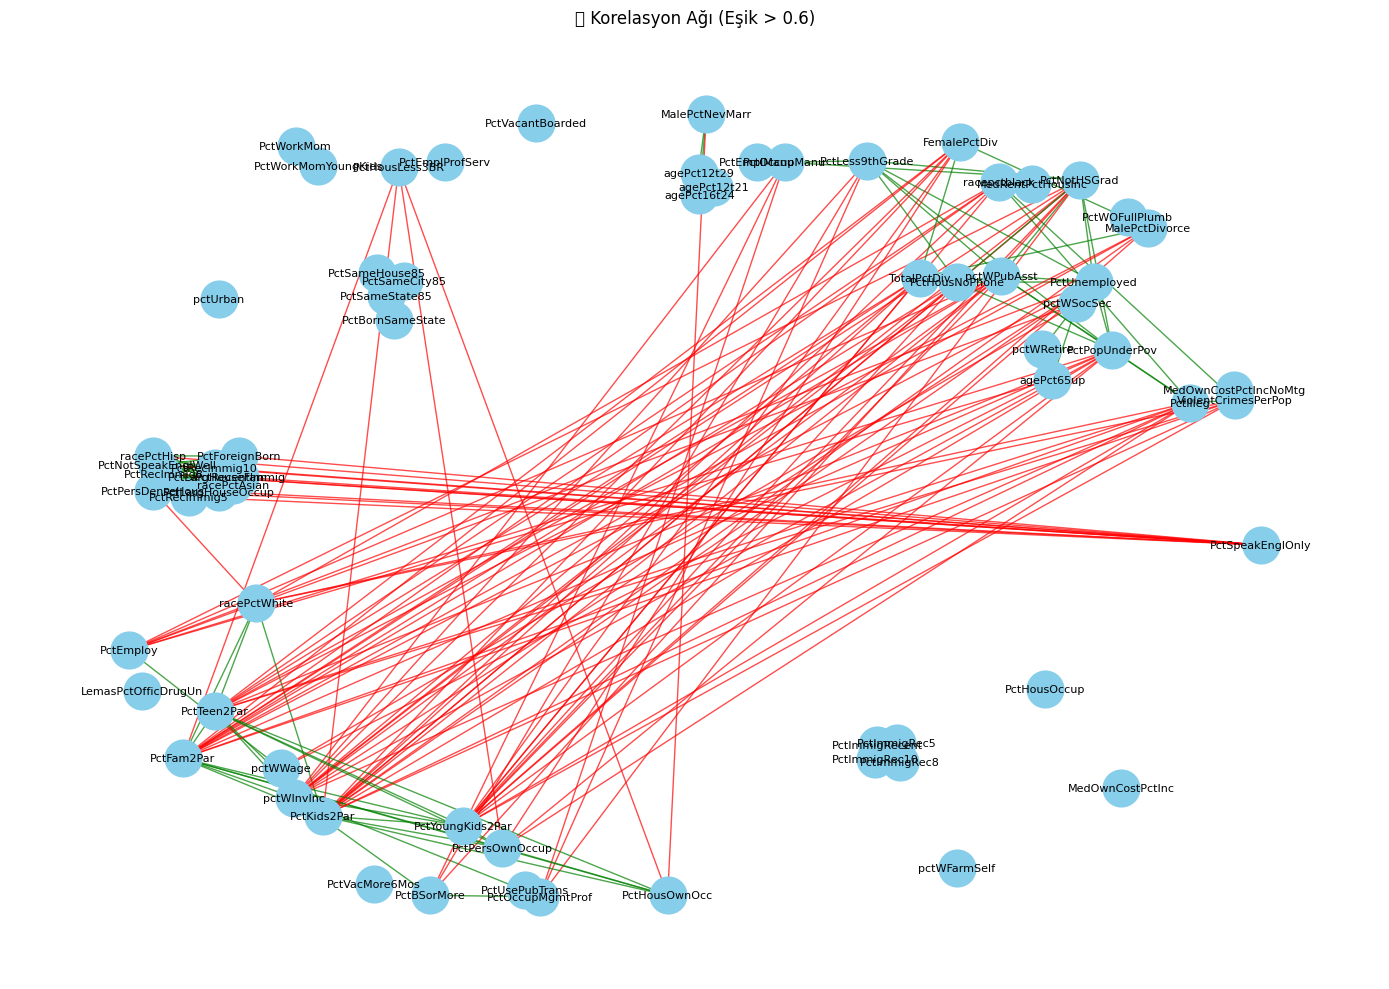

In [43]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Excel'den korelasyon matrisi yükle
corr_matrix = pd.read_excel("communities+and+crime/correlation_rates.xlsx", index_col=0)

# Korelasyon eşiği
threshold = 0.6

# Boş grafik başlat
G = nx.Graph()

# Düğümleri ekle
for col in corr_matrix.columns:
    G.add_node(col)

# Kenarları ekle (sadece eşik üzeri korelasyonlar)
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) >= threshold:
            G.add_edge(
                corr_matrix.columns[i],
                corr_matrix.columns[j],
                weight=corr_val
            )

# Grafik çizimi
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, seed=42)

edges = G.edges(data=True)
edge_colors = ['red' if d['weight'] < 0 else 'green' for (_, _, d) in edges]

nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=700)
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, alpha=0.7)
nx.draw_networkx_labels(G, pos, font_size=8, font_color='black')

plt.title(f"📈 Korelasyon Ağı (Eşik > {threshold})")
plt.axis('off')
plt.tight_layout()
plt.savefig("figures/correlation_graph.png", dpi=300)
plt.show()


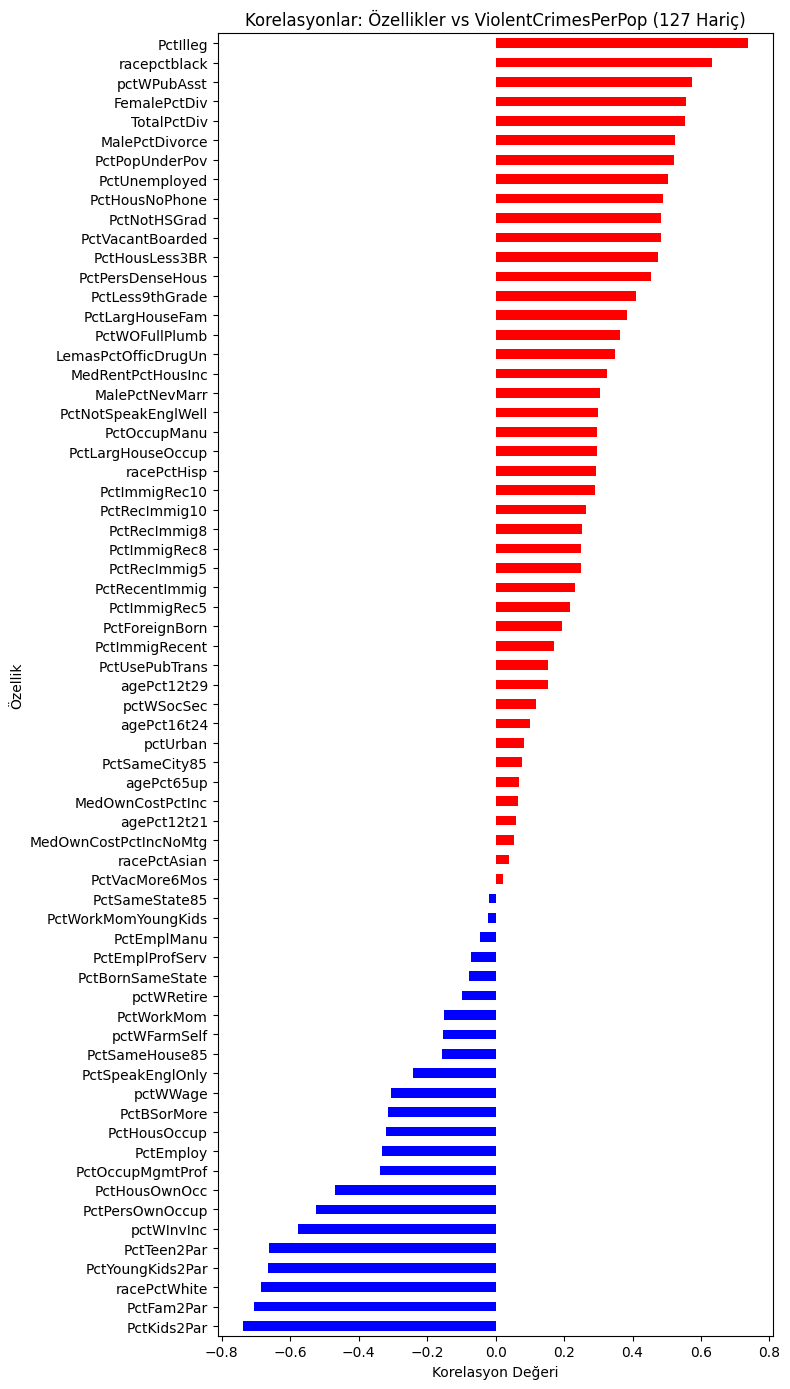

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Dosyayı oku
corr_df = pd.read_excel("communities+and+crime/correlation_to_column100.xlsx", index_col=0)
target_col = corr_df.columns[0]

# Index'i string yap (garanti çözüm)
corr_df.index = corr_df.index.map(str)
target_col = str(target_col)

# '127' özelliğini ve hedef sütunu çıkar
corr_series = corr_df.loc[
    (corr_df.index != target_col) & (corr_df.index != "127"),
    target_col
].sort_values()

# Renk ataması
colors = ['red' if val > 0 else 'blue' for val in corr_series]

# Grafik
plt.figure(figsize=(8, 14))
corr_series.plot(kind='barh', color=colors)
plt.title(f"Korelasyonlar: Özellikler vs {target_col} (127 Hariç)")
plt.xlabel("Korelasyon Değeri")
plt.ylabel("Özellik")
plt.tight_layout()
plt.savefig("figures/correlation_bar_plot_excluding_127.png", dpi=300)
plt.show()


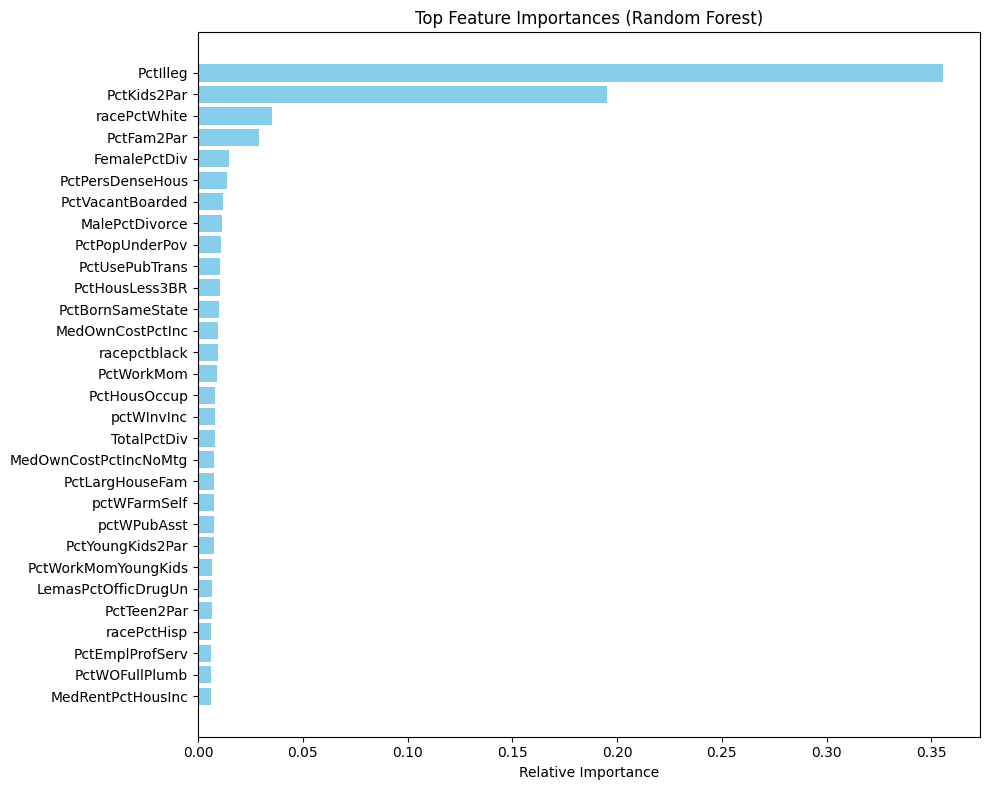

In [45]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Veriyi oku
df = pd.read_excel("communities+and+crime/kinda_cleaned.xlsx")

# Hedef sütun (örn: "100")
target_col = df_final.columns[-1]
X = df.drop(columns=[target_col])
y = df[target_col]

# Model eğit
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Önem skorlarını al
importances = model.feature_importances_
feature_names = X.columns

# DataFrame'e aktar
imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(30)

# Çizim
plt.figure(figsize=(10, 8))
plt.barh(imp_df['Feature'], imp_df['Importance'], color='skyblue')
plt.xlabel("Relative Importance")
plt.title("Top Feature Importances (Random Forest)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("figures/random_forest_feature_importances.png", dpi=300)
plt.show()


In [46]:
import pandas as pd
import numpy as np

# Veriyi yükle
df = pd.read_excel("communities+and+crime/kinda_cleaned.xlsx")
X = df.drop(columns=[target_col])
y = df[target_col]

# Özellik isimlerini string olarak al
feature_names = X.columns.astype(str)

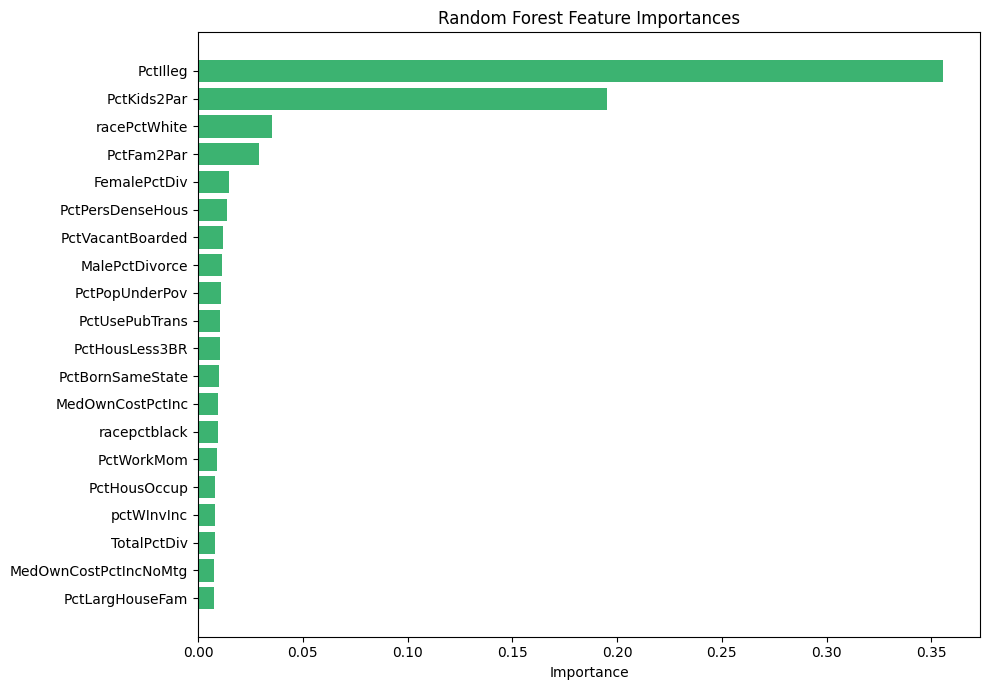

In [47]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Modeli eğit
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Önem skorlarını al
importances = rf_model.feature_importances_
imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
imp_df = imp_df.sort_values(by='Importance', ascending=False).head(20)

# Grafik çizimi
fig, ax = plt.subplots(figsize=(10, 7), facecolor='white')

ax.barh(imp_df['Feature'], imp_df['Importance'], color='mediumseagreen')
ax.set_title("Random Forest Feature Importances", color='black')
ax.set_xlabel("Importance", color='black')
ax.set_facecolor('white')  # İç alanı da beyaz yap!
ax.tick_params(colors='black')  # Eksendeki yazılar siyah
ax.invert_yaxis()

plt.tight_layout()
plt.savefig("figures/feature_importance_random_forest.png", dpi=300, facecolor='white')
plt.show()

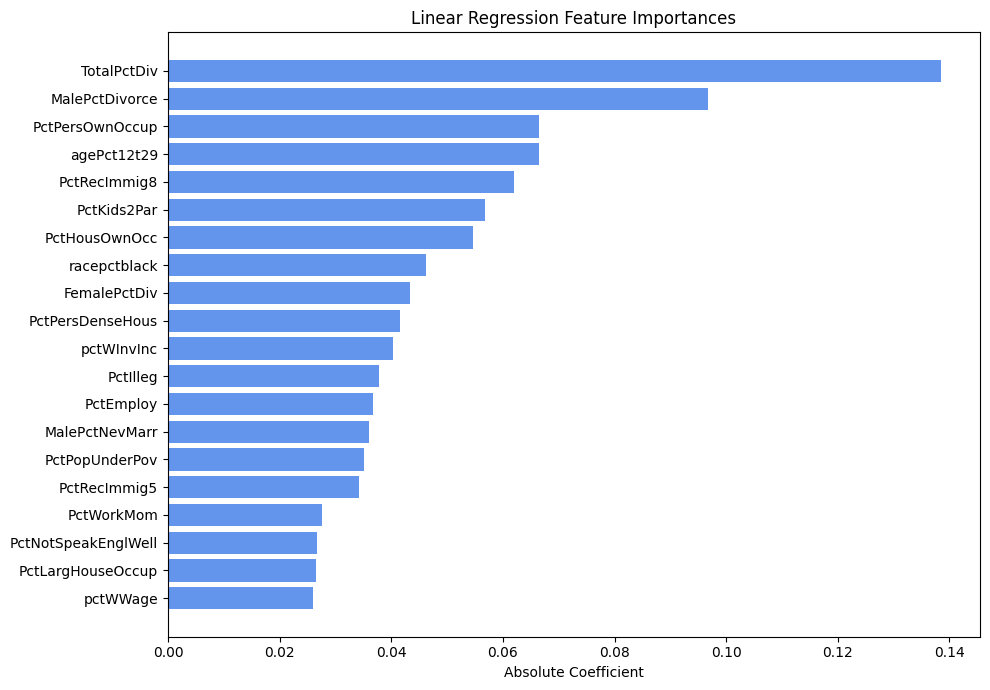

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Normalize et
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Modeli eğit
lr_model = LinearRegression()
lr_model.fit(X_scaled, y)

# Katsayıların mutlak değeri
importances = np.abs(lr_model.coef_)
imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
imp_df = imp_df.sort_values(by='Importance', ascending=False).head(20)

# Grafik (düzenlenmiş)
fig, ax = plt.subplots(figsize=(10, 7), facecolor='white')

ax.barh(imp_df['Feature'], imp_df['Importance'], color='cornflowerblue')
ax.set_title("Linear Regression Feature Importances", color='black')
ax.set_xlabel("Absolute Coefficient", color='black')
ax.set_facecolor('white')  # İç alan
ax.tick_params(colors='black')  # Yazılar
ax.invert_yaxis()

plt.tight_layout()
plt.savefig("figures/feature_importance_linear_regression.png", dpi=300, facecolor='white')
plt.show()


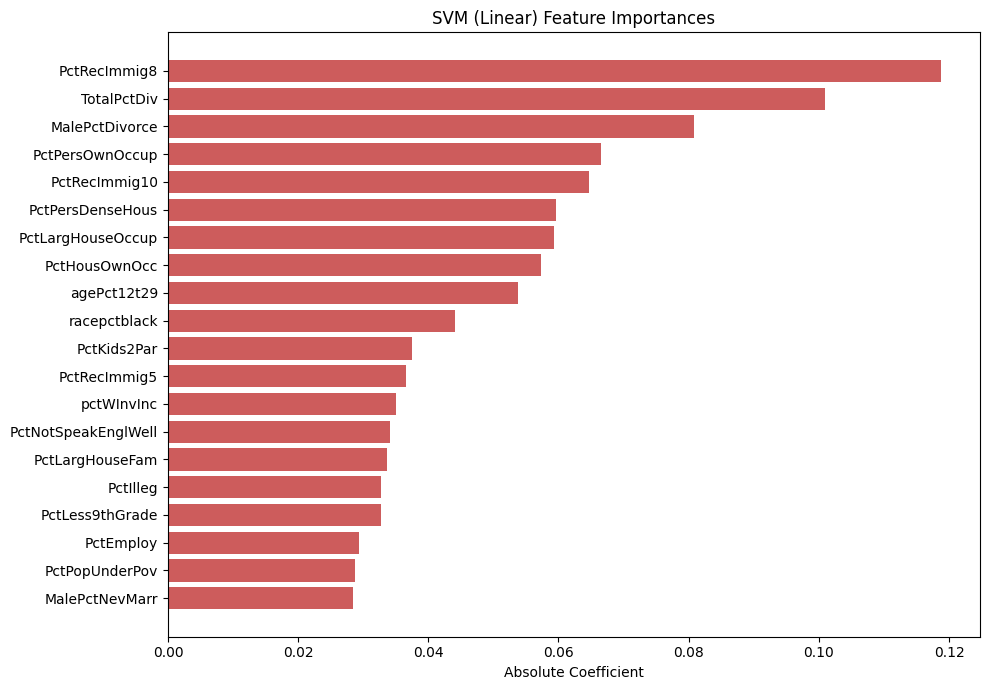

In [50]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# Modeli eğit
svm_model = SVR(kernel='linear')
svm_model.fit(X_scaled, y)

# Katsayıların mutlak değeri
importances = np.abs(svm_model.coef_.flatten())
imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
imp_df = imp_df.sort_values(by='Importance', ascending=False).head(20)

# Grafik (düzenlenmiş)
fig, ax = plt.subplots(figsize=(10, 7), facecolor='white')

ax.barh(imp_df['Feature'], imp_df['Importance'], color='indianred')
ax.set_title("SVM (Linear) Feature Importances", color='black')
ax.set_xlabel("Absolute Coefficient", color='black')
ax.set_facecolor('white')
ax.tick_params(colors='black')
ax.invert_yaxis()

plt.tight_layout()
plt.savefig("figures/feature_importance_svm_linear.png", dpi=300, facecolor='white')
plt.show()

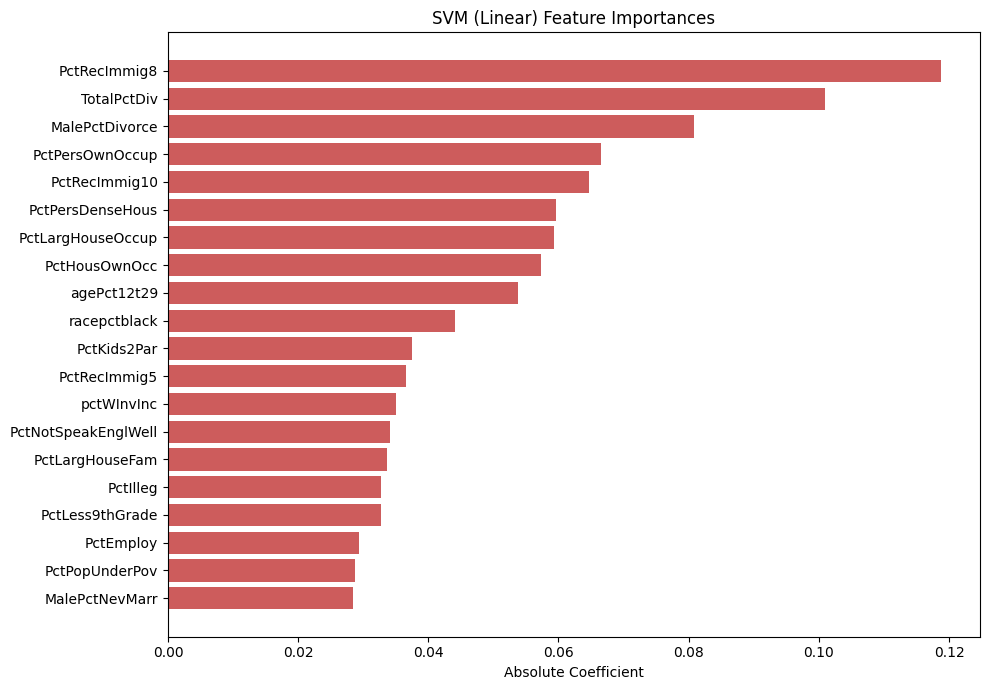

In [51]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# Modeli eğit
svm_model = SVR(kernel='linear')
svm_model.fit(X_scaled, y)

# Katsayıların mutlak değeri
importances = np.abs(svm_model.coef_.flatten())
imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
imp_df = imp_df.sort_values(by='Importance', ascending=False).head(20)

# Grafik (düzenlenmiş)
fig, ax = plt.subplots(figsize=(10, 7), facecolor='white')

ax.barh(imp_df['Feature'], imp_df['Importance'], color='indianred')
ax.set_title("SVM (Linear) Feature Importances", color='black')
ax.set_xlabel("Absolute Coefficient", color='black')
ax.set_facecolor('white')
ax.tick_params(colors='black')
ax.invert_yaxis()

plt.tight_layout()
plt.savefig("figures/feature_importance_svm_linear.png", dpi=300, facecolor='white')
plt.show()

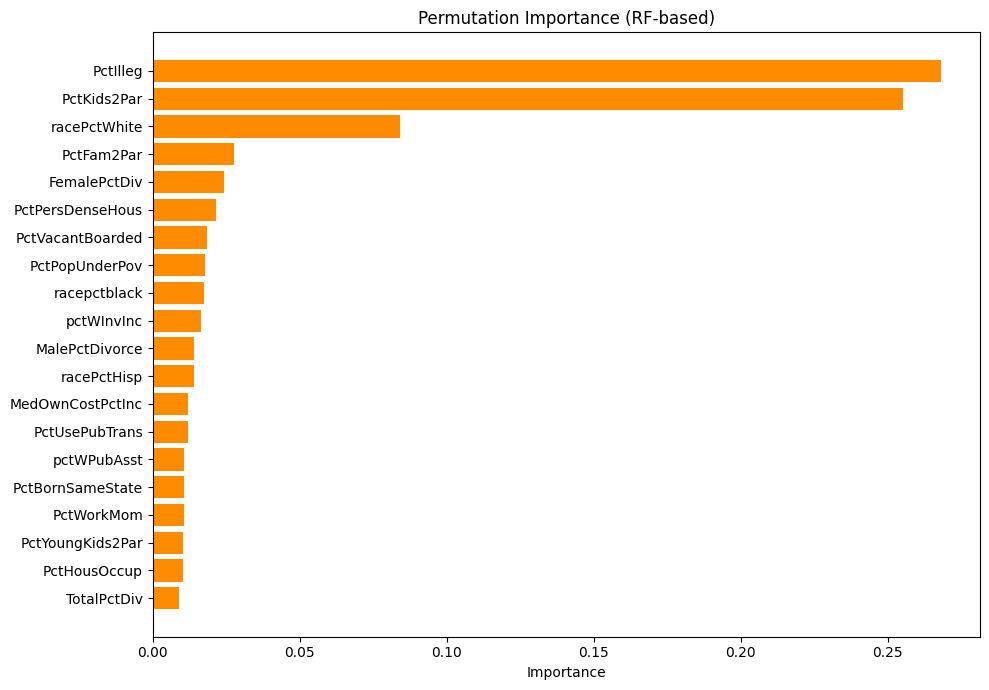

In [52]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Permutasyon önem analizi
perm = permutation_importance(rf_model, X, y, n_repeats=10, random_state=42, n_jobs=-1)
importances = perm.importances_mean

imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
imp_df = imp_df.sort_values(by='Importance', ascending=False).head(20)

# Grafik (düzenlenmiş)
fig, ax = plt.subplots(figsize=(10, 7), facecolor='white')

ax.barh(imp_df['Feature'], imp_df['Importance'], color='darkorange')
ax.set_title("Permutation Importance (RF-based)", color='black')
ax.set_xlabel("Importance", color='black')
ax.set_facecolor('white')
ax.tick_params(colors='black')
ax.invert_yaxis()

plt.tight_layout()
plt.savefig("figures/feature_importance_permutation.png", dpi=300, facecolor='white')
plt.show()


In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Veriyi yükle
df = pd.read_excel("communities+and+crime/kinda_cleaned.xlsx")

# Hedefi kategorilere ayır (5 sınıf)
def classify(val):
    if val < 0.20:  # Very Low
        return 0
    elif val < 0.40: # Low
        return 1
    elif val < 0.60: # Medium
        return 2
    elif val < 0.80: # High
        return 3
    else:
        return 4    # Very High

df["CrimeLevel"] = df[df.columns[-1]].apply(classify)

# Korelasyonu yüksek özellikleri yükle
corr_df = pd.read_excel("communities+and+crime/correlation_to_column100.xlsx", index_col=0)
corr_df.index = corr_df.index.map(str)
top_features = corr_df[abs(corr_df[corr_df.columns[0]]) > 0.3].index.tolist()
top_features = [f for f in top_features if f != "100"]

X = df[top_features]
y = df["CrimeLevel"]

# Eksik varsa doldur
X = SimpleImputer(strategy='mean').fit_transform(X)

# Normalizasyon (sadece gerekli modeller için)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Eğitim/test böl (aynı bölme tüm modellerde kullanılacak)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled, X_test_scaled = train_test_split(X_scaled, test_size=0.2, random_state=42)


✅ Logistic Regression Accuracy: 0.8120

📊 Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       255
           1       0.57      0.73      0.64        74
           2       0.42      0.24      0.30        42
           3       1.00      0.12      0.21        17
           4       0.73      1.00      0.85        11

    accuracy                           0.81       399
   macro avg       0.73      0.61      0.59       399
weighted avg       0.81      0.81      0.79       399



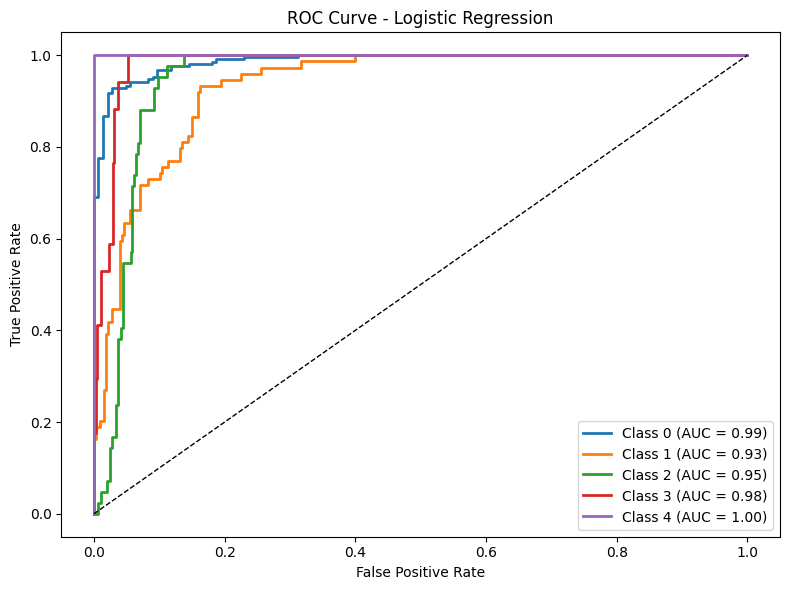

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Modeli eğit
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

# Tahminler
y_pred = log_model.predict(X_test)
y_score = log_model.predict_proba(X_test)

# Accuracy ve classification report
acc = accuracy_score(y_test, y_pred)
print(f"✅ Logistic Regression Accuracy: {acc:.4f}")
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

# ROC çizimi için y_test'i binarize et
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
n_classes = y_test_bin.shape[1]

# ROC eğrisi çizimi
plt.figure(figsize=(8, 6), facecolor='white')
ax = plt.gca()
ax.set_facecolor('white')  # ROC alanının arka planı beyaz

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Class {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel("False Positive Rate", color='black')
plt.ylabel("True Positive Rate", color='black')
plt.title("ROC Curve - Logistic Regression", color='black')
ax.tick_params(colors='black')
plt.legend(loc="lower right", facecolor='white')
plt.tight_layout()
plt.savefig("figures/roc_logistic_regression.png", dpi=300, facecolor='white')
plt.show()


✅ SVM Accuracy: 0.9298

📊 Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       255
           1       0.83      0.88      0.86        74
           2       0.80      0.79      0.80        42
           3       1.00      0.65      0.79        17
           4       1.00      1.00      1.00        11

    accuracy                           0.93       399
   macro avg       0.92      0.86      0.88       399
weighted avg       0.93      0.93      0.93       399



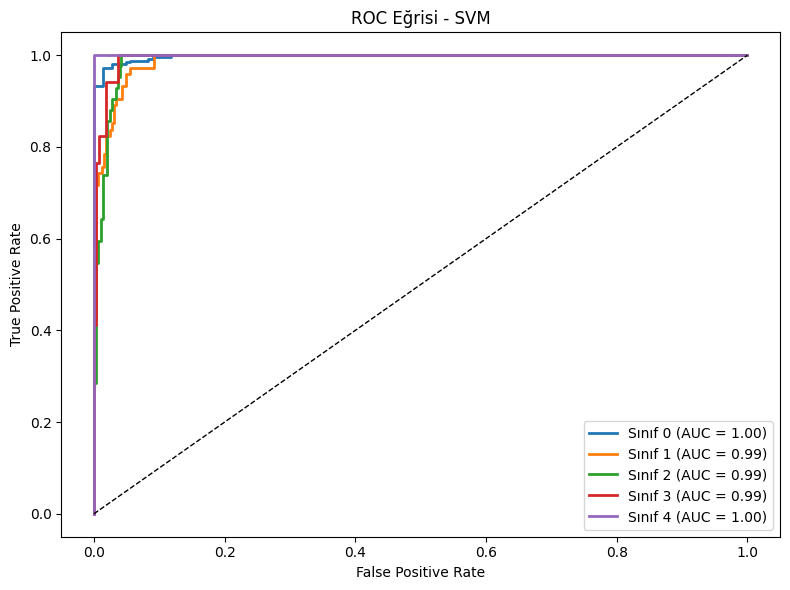

In [57]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# SVM modelini tanımla ve eğit
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Tahmin ve skor
y_pred = svm_model.predict(X_test)
y_score = svm_model.predict_proba(X_test)

# Accuracy ve classification report
acc = accuracy_score(y_test, y_pred)
print(f"✅ SVM Accuracy: {acc:.4f}")
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

# ROC için binarize
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
n_classes = y_test_bin.shape[1]

# ROC Eğrisi
plt.figure(figsize=(8, 6), facecolor='white')
ax = plt.gca()
ax.set_facecolor('white')

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Sınıf {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel("False Positive Rate", color='black')
plt.ylabel("True Positive Rate", color='black')
plt.title("ROC Eğrisi - SVM", color='black')
ax.tick_params(colors='black')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("figures/roc_svm.png", dpi=300, facecolor='white')
plt.show()

✅ Random Forest Accuracy: 0.9950

📊 Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       255
           1       1.00      1.00      1.00        74
           2       1.00      1.00      1.00        42
           3       1.00      0.88      0.94        17
           4       0.85      1.00      0.92        11

    accuracy                           0.99       399
   macro avg       0.97      0.98      0.97       399
weighted avg       1.00      0.99      1.00       399



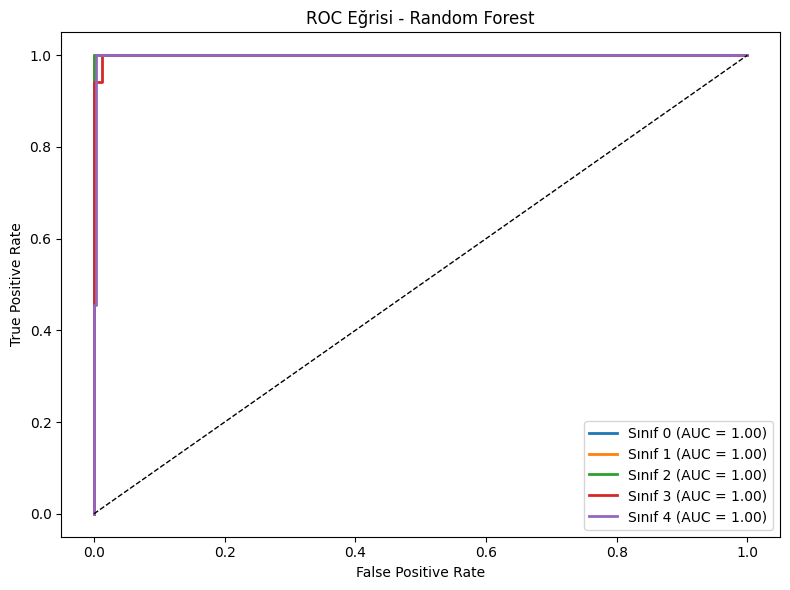

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Modeli eğit
rf_model = RandomForestClassifier(n_estimators=100, max_depth=6, min_samples_leaf=10, min_samples_split=10, max_features=0.5, random_state=42, max_samples=0.8)
rf_model.fit(X_train, y_train)
#max_depth and min_samples_leaf added to avoid overfitting

# Tahmin ve skor
y_pred = rf_model.predict(X_test)
y_score = rf_model.predict_proba(X_test)

# Accuracy ve classification report
acc = accuracy_score(y_test, y_pred)
print(f"✅ Random Forest Accuracy: {acc:.4f}")
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

# ROC için binarize
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
n_classes = y_test_bin.shape[1]

# ROC Eğrisi çizimi
plt.figure(figsize=(8, 6), facecolor='white')
ax = plt.gca()
ax.set_facecolor('white')

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Sınıf {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel("False Positive Rate", color='black')
plt.ylabel("True Positive Rate", color='black')
plt.title("ROC Eğrisi - Random Forest", color='black')
ax.tick_params(colors='black')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("figures/roc_random_forest.png", dpi=300, facecolor='white')
plt.show()


✅ Decision Tree Accuracy: 0.9950

📊 Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       255
           1       1.00      1.00      1.00        74
           2       1.00      1.00      1.00        42
           3       1.00      0.88      0.94        17
           4       0.85      1.00      0.92        11

    accuracy                           0.99       399
   macro avg       0.97      0.98      0.97       399
weighted avg       1.00      0.99      1.00       399



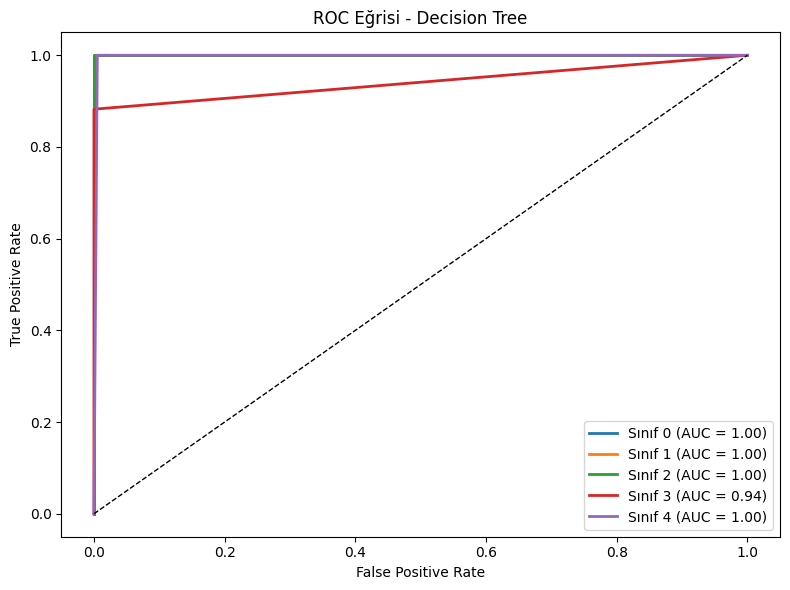

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Modeli eğit
dt_model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=42)
dt_model.fit(X_train, y_train)

# Tahmin ve skor
y_pred = dt_model.predict(X_test)
y_score = dt_model.predict_proba(X_test)

# Accuracy ve classification report
acc = accuracy_score(y_test, y_pred)
print(f"✅ Decision Tree Accuracy: {acc:.4f}")
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

# ROC için binarize
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
n_classes = y_test_bin.shape[1]

# ROC Eğrisi çizimi
plt.figure(figsize=(8, 6), facecolor='white')
ax = plt.gca()
ax.set_facecolor('white')

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Sınıf {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel("False Positive Rate", color='black')
plt.ylabel("True Positive Rate", color='black')
plt.title("ROC Eğrisi - Decision Tree", color='black')
ax.tick_params(colors='black')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("figures/roc_decision_tree.png", dpi=300, facecolor='white')
plt.show()


✅ KNN Accuracy: 0.7594

📊 Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       255
           1       0.52      0.64      0.57        74
           2       0.41      0.29      0.34        42
           3       0.10      0.06      0.07        17
           4       0.57      0.36      0.44        11

    accuracy                           0.76       399
   macro avg       0.50      0.46      0.47       399
weighted avg       0.74      0.76      0.75       399



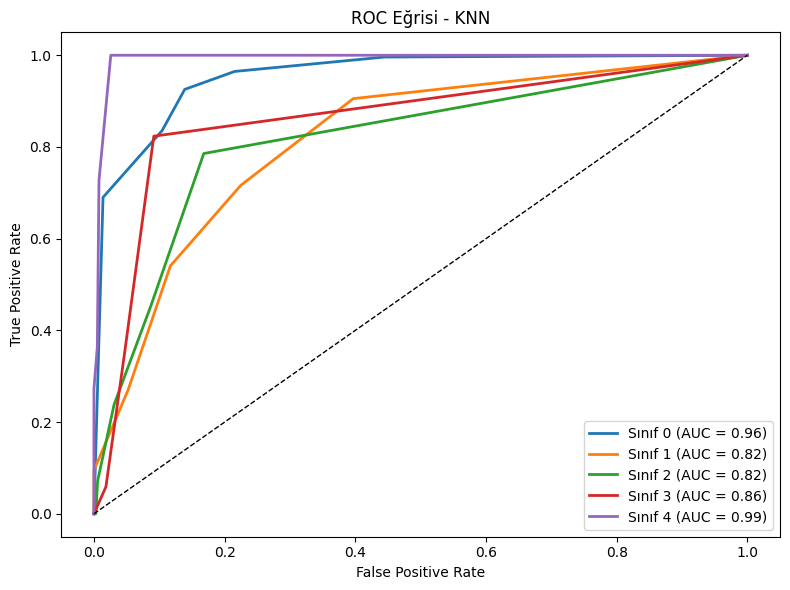

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Modeli oluştur ve eğit
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Tahminler
y_pred = knn_model.predict(X_test)
y_score = knn_model.predict_proba(X_test)

# Doğruluk ve rapor
acc = accuracy_score(y_test, y_pred)
print(f"✅ KNN Accuracy: {acc:.4f}")
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

# ROC eğrisi
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(8, 6), facecolor='white')
ax = plt.gca()
ax.set_facecolor('white')

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Sınıf {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel("False Positive Rate", color='black')
plt.ylabel("True Positive Rate", color='black')
plt.title("ROC Eğrisi - KNN", color='black')
ax.tick_params(colors='black')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("figures/roc_knn.png", dpi=300, facecolor='white')
plt.show()


✅ Naive Bayes Accuracy: 0.8095

📊 Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.87      0.90       255
           1       0.54      0.66      0.59        74
           2       0.69      0.74      0.71        42
           3       0.90      0.53      0.67        17
           4       0.73      1.00      0.85        11

    accuracy                           0.81       399
   macro avg       0.76      0.76      0.74       399
weighted avg       0.83      0.81      0.82       399



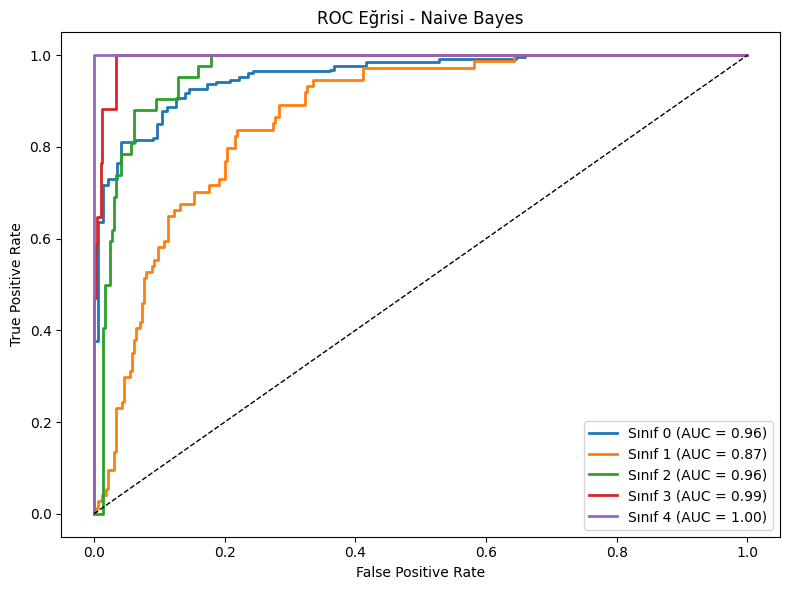

In [61]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Modeli oluştur ve eğit
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Tahminler
y_pred = nb_model.predict(X_test)
y_score = nb_model.predict_proba(X_test)

# Doğruluk ve rapor
acc = accuracy_score(y_test, y_pred)
print(f"✅ Naive Bayes Accuracy: {acc:.4f}")
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

# ROC eğrisi
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(8, 6), facecolor='white')
ax = plt.gca()
ax.set_facecolor('white')

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Sınıf {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel("False Positive Rate", color='black')
plt.ylabel("True Positive Rate", color='black')
plt.title("ROC Eğrisi - Naive Bayes", color='black')
ax.tick_params(colors='black')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("figures/roc_naive_bayes.png", dpi=300, facecolor='white')
plt.show()


✅ Gradient Boosting Accuracy: 0.9950

📊 Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       255
           1       1.00      1.00      1.00        74
           2       1.00      1.00      1.00        42
           3       1.00      0.88      0.94        17
           4       0.85      1.00      0.92        11

    accuracy                           0.99       399
   macro avg       0.97      0.98      0.97       399
weighted avg       1.00      0.99      1.00       399



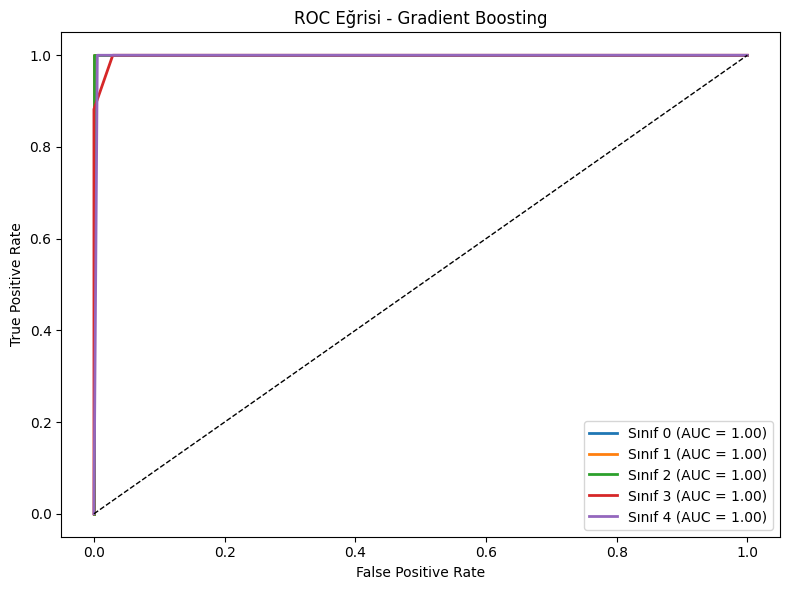

In [62]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Modeli eğit
gb_model = GradientBoostingClassifier(n_estimators=300, max_depth=3, learning_rate=0.03, subsample=0.8, min_samples_leaf=10, min_samples_split=10, random_state=42)
#max_depth, learning_rate and subsample added to avoid overfitting

gb_model.fit(X_train, y_train)

# Tahminler
y_pred = gb_model.predict(X_test)
y_score = gb_model.predict_proba(X_test)

# Accuracy ve classification report
acc = accuracy_score(y_test, y_pred)
print(f"✅ Gradient Boosting Accuracy: {acc:.4f}")
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

# ROC çizimi
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(8, 6), facecolor='white')
ax = plt.gca()
ax.set_facecolor('white')

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Sınıf {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel("False Positive Rate", color='black')
plt.ylabel("True Positive Rate", color='black')
plt.title("ROC Eğrisi - Gradient Boosting", color='black')
ax.tick_params(colors='black')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("figures/roc_gradient_boosting.png", dpi=300, facecolor='white')
plt.show()


✅ CatBoost Accuracy: 0.9950

📊 Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       255
           1       1.00      1.00      1.00        74
           2       1.00      1.00      1.00        42
           3       1.00      0.88      0.94        17
           4       0.85      1.00      0.92        11

    accuracy                           0.99       399
   macro avg       0.97      0.98      0.97       399
weighted avg       1.00      0.99      1.00       399



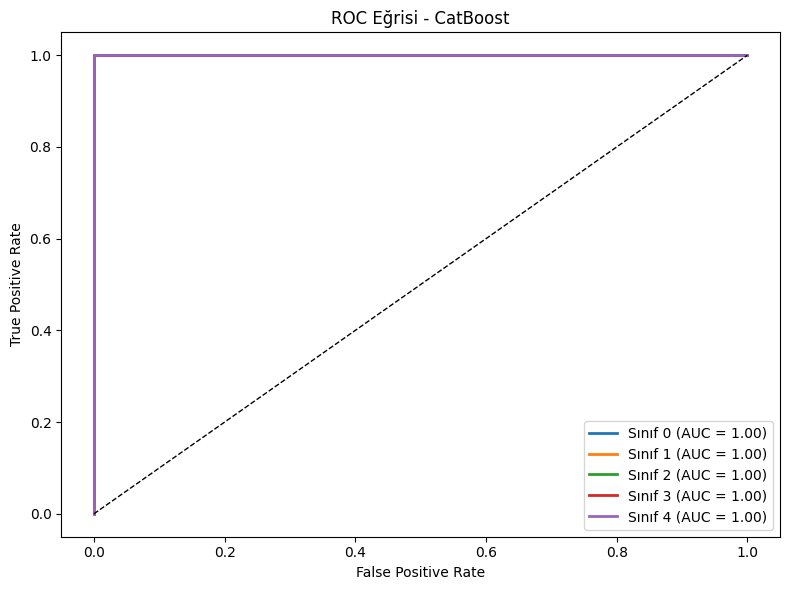

In [63]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Modeli eğit (sessiz modda)
cat_model = CatBoostClassifier(verbose=0, depth=4, learning_rate=0.03, l2_leaf_reg=10, bootstrap_type='Bernoulli', subsample=0.8, iterations=500, early_stopping_rounds=20, random_state=42)
cat_model.fit(X_train, y_train)

# Tahminler
y_pred = cat_model.predict(X_test)
y_score = cat_model.predict_proba(X_test)

# Accuracy ve classification report
acc = accuracy_score(y_test, y_pred)
print(f"✅ CatBoost Accuracy: {acc:.4f}")
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

# ROC çizimi
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(8, 6), facecolor='white')
ax = plt.gca()
ax.set_facecolor('white')

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Sınıf {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel("False Positive Rate", color='black')
plt.ylabel("True Positive Rate", color='black')
plt.title("ROC Eğrisi - CatBoost", color='black')
ax.tick_params(colors='black')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("figures/roc_catboost.png", dpi=300, facecolor='white')
plt.show()


✅ MLPClassifier Accuracy: 0.8747

📊 Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       255
           1       0.69      0.80      0.74        74
           2       0.68      0.55      0.61        42
           3       1.00      0.47      0.64        17
           4       0.92      1.00      0.96        11

    accuracy                           0.87       399
   macro avg       0.85      0.76      0.78       399
weighted avg       0.88      0.87      0.87       399



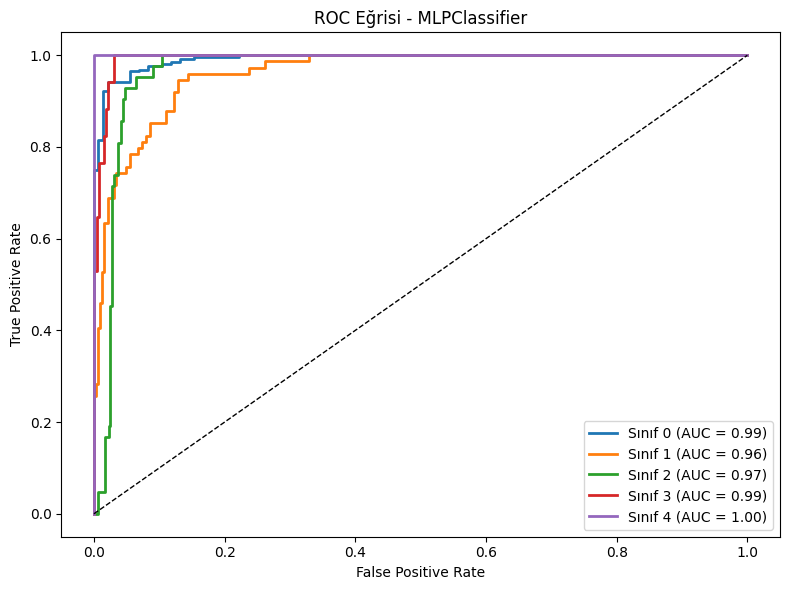

In [64]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Modeli oluştur ve eğit
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, alpha=0.001, early_stopping=True, random_state=42)
mlp_model.fit(X_train, y_train)

# Tahminler
y_pred = mlp_model.predict(X_test)
y_score = mlp_model.predict_proba(X_test)

# Accuracy ve classification report
acc = accuracy_score(y_test, y_pred)
print(f"✅ MLPClassifier Accuracy: {acc:.4f}")
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

# ROC çizimi
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(8, 6), facecolor='white')
ax = plt.gca()
ax.set_facecolor('white')

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Sınıf {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel("False Positive Rate", color='black')
plt.ylabel("True Positive Rate", color='black')
plt.title("ROC Eğrisi - MLPClassifier", color='black')
ax.tick_params(colors='black')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("figures/roc_mlpclassifier.png", dpi=300, facecolor='white')
plt.show()


✅ Survivorship Naive Bayes Accuracy: 0.8095

📊 Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.87      0.90       255
           1       0.54      0.66      0.59        74
           2       0.69      0.74      0.71        42
           3       0.90      0.53      0.67        17
           4       0.73      1.00      0.85        11

    accuracy                           0.81       399
   macro avg       0.76      0.76      0.74       399
weighted avg       0.83      0.81      0.82       399



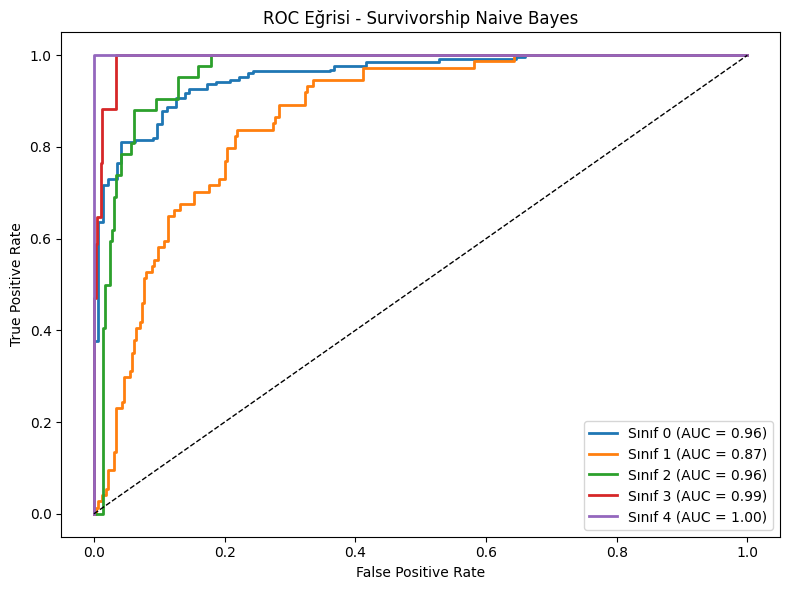

In [65]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Class priors'ı veri setindeki oranlara göre ayarla
class_counts = np.bincount(y_train)
class_priors = class_counts / class_counts.sum()

# Modeli oluştur ve eğit
nb_model = GaussianNB(priors=class_priors)
nb_model.fit(X_train, y_train)

# Tahminler
y_pred = nb_model.predict(X_test)
y_score = nb_model.predict_proba(X_test)

# Accuracy ve classification report
acc = accuracy_score(y_test, y_pred)
print(f"✅ Survivorship Naive Bayes Accuracy: {acc:.4f}")
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

# ROC çizimi
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(8, 6), facecolor='white')
ax = plt.gca()
ax.set_facecolor('white')

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Sınıf {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel("False Positive Rate", color='black')
plt.ylabel("True Positive Rate", color='black')
plt.title("ROC Eğrisi - Survivorship Naive Bayes", color='black')
ax.tick_params(colors='black')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("figures/roc_survivorship_naive_bayes.png", dpi=300, facecolor='white')
plt.show()


In [66]:

from sklearn.model_selection import cross_val_score

models = {
    "Logistic Regression": log_model,
    "SVM": svm_model,
    "Random Forest": rf_model,
    "Decision Tree": dt_model,
    "KNN": knn_model,
    "Naive Bayes": nb_model,
    "Gradient Boosting": gb_model,
    "CatBoost": cat_model,
    "MLPClassifier": mlp_model
}

for name, model in models.items():
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    cv_scores = cross_val_score(model, X, y, cv=5)

    print(f"📌 {name}")
    print(f"   🟩 Train Accuracy: {train_acc:.4f}")
    print(f"   🟥 Test Accuracy: {test_acc:.4f}")
    print(f"   🔄 Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}\n")


📌 Logistic Regression
   🟩 Train Accuracy: 0.8389
   🟥 Test Accuracy: 0.8120
   🔄 Cross-Validation Accuracy: 0.8160 ± 0.0227

📌 SVM
   🟩 Train Accuracy: 0.9530
   🟥 Test Accuracy: 0.9298
   🔄 Cross-Validation Accuracy: 0.9253 ± 0.0192

📌 Random Forest
   🟩 Train Accuracy: 0.9969
   🟥 Test Accuracy: 0.9950
   🔄 Cross-Validation Accuracy: 0.9955 ± 0.0025

📌 Decision Tree
   🟩 Train Accuracy: 1.0000
   🟥 Test Accuracy: 0.9950
   🔄 Cross-Validation Accuracy: 1.0000 ± 0.0000

📌 KNN
   🟩 Train Accuracy: 0.7881
   🟥 Test Accuracy: 0.7594
   🔄 Cross-Validation Accuracy: 0.7141 ± 0.0127

📌 Naive Bayes
   🟩 Train Accuracy: 0.8107
   🟥 Test Accuracy: 0.8095
   🔄 Cross-Validation Accuracy: 0.7989 ± 0.0347

📌 Gradient Boosting
   🟩 Train Accuracy: 1.0000
   🟥 Test Accuracy: 0.9950
   🔄 Cross-Validation Accuracy: 1.0000 ± 0.0000

📌 CatBoost
   🟩 Train Accuracy: 1.0000
   🟥 Test Accuracy: 0.9950
   🔄 Cross-Validation Accuracy: 1.0000 ± 0.0000

📌 MLPClassifier
   🟩 Train Accuracy: 0.9078
   🟥 Test Acc

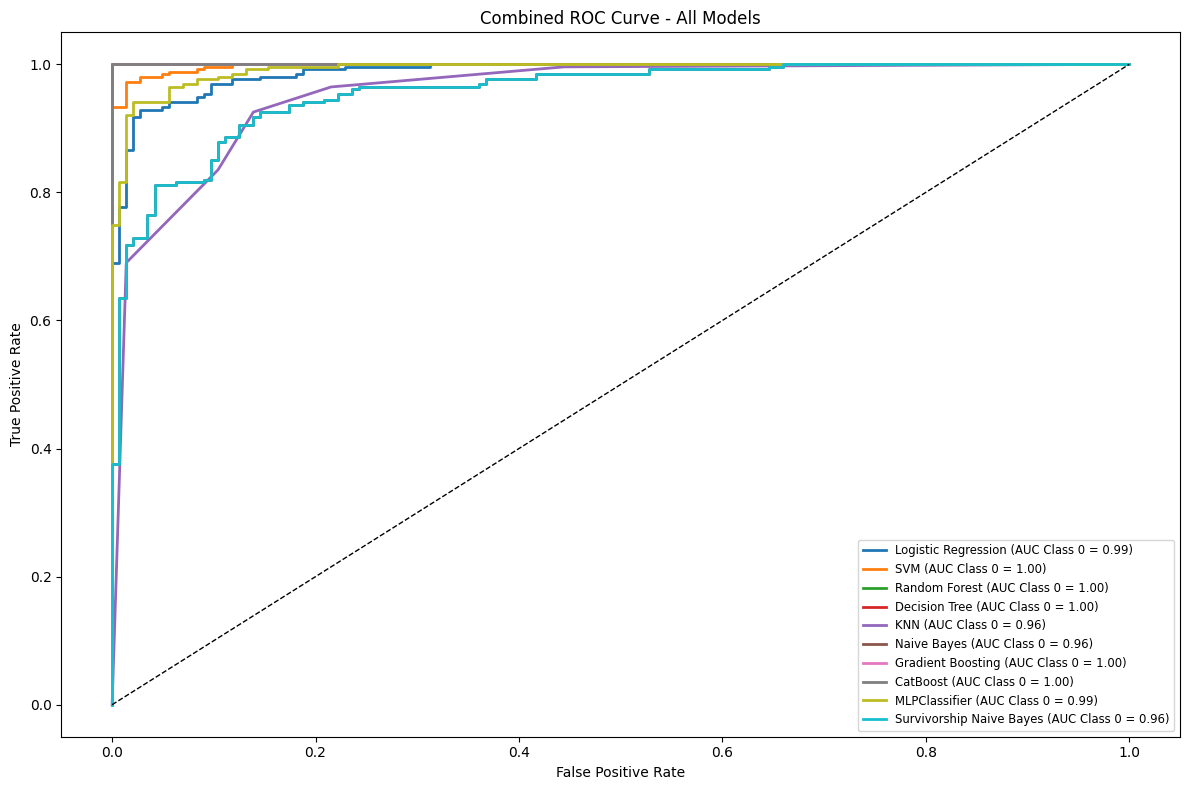

,Model,Mean AUC
7,CatBoost,1.0000
2,Random Forest,0.9996
6,Gradient Boosting,0.9991
1,SVM,0.9944
3,Decision Tree,0.9877
8,MLPClassifier,0.9830
0,Logistic Regression,0.9704
5,Naive Bayes,0.9555
9,Survivorship Naive Bayes,0.9555
4,KNN,0.8887


In [67]:

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize target for multiclass ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
n_classes = y_test_bin.shape[1]

models = {
    "Logistic Regression": log_model,
    "SVM": svm_model,
    "Random Forest": rf_model,
    "Decision Tree": dt_model,
    "KNN": knn_model,
    "Naive Bayes": nb_model,
    "Gradient Boosting": gb_model,
    "CatBoost": cat_model,
    "MLPClassifier": mlp_model,
    "Survivorship Naive Bayes": nb_model  # Assuming the same model is reused for both variants
}

auc_summary = {}

plt.figure(figsize=(12, 8), facecolor='white')
ax = plt.gca()
ax.set_facecolor('white')

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)
    elif hasattr(model, "decision_function"):
        y_score = model.decision_function(X_test)
    else:
        continue  # Skip models without probability/score support

    mean_auc = 0
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        mean_auc += roc_auc
        if i == 0:
            plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC Class 0 = {roc_auc:.2f})")
    mean_auc /= n_classes
    auc_summary[name] = round(mean_auc, 4)

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel("False Positive Rate", color='black')
plt.ylabel("True Positive Rate", color='black')
plt.title("Combined ROC Curve - All Models", color='black')
ax.tick_params(colors='black')
plt.legend(loc="lower right", fontsize="small")
plt.tight_layout()
plt.show()

# Display AUC summary
import pandas as pd
auc_df = pd.DataFrame(list(auc_summary.items()), columns=["Model", "Mean AUC"]).sort_values(by="Mean AUC", ascending=False)
display(auc_df)


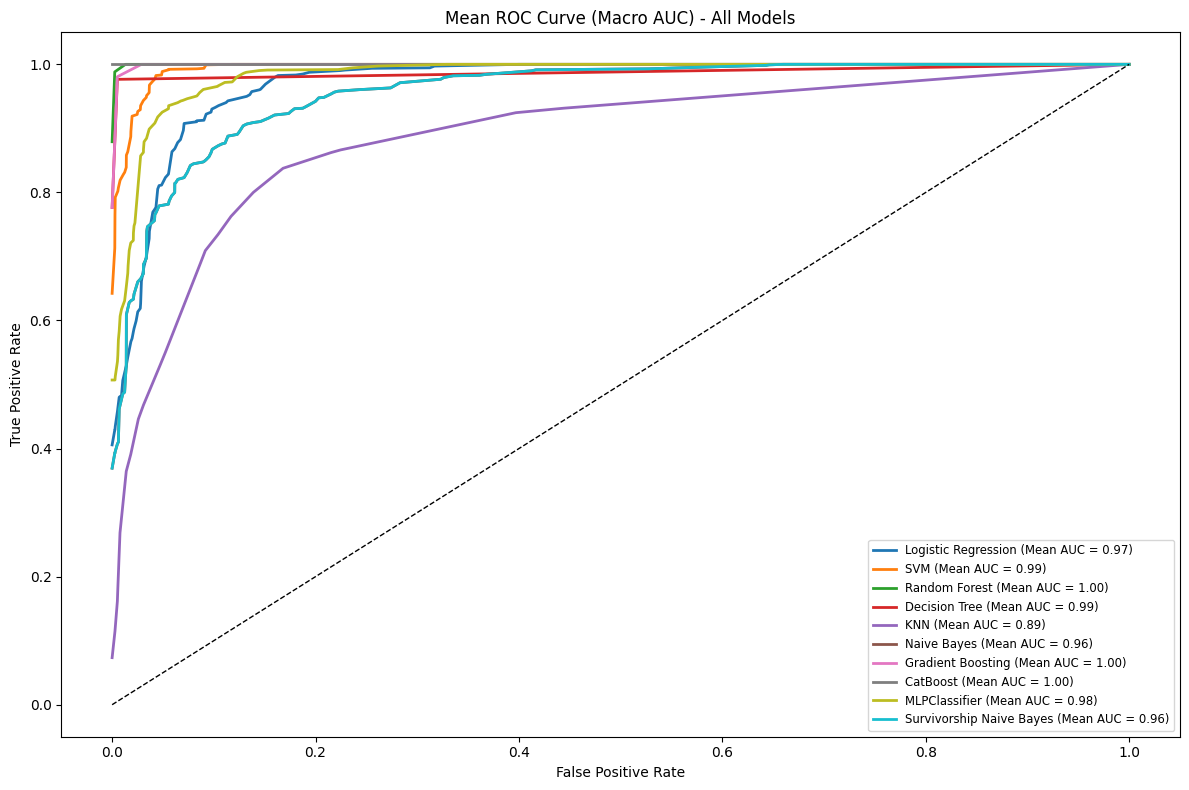

,Model,Macro AUC
7,CatBoost,1.0000
2,Random Forest,0.9998
6,Gradient Boosting,0.9991
1,SVM,0.9947
3,Decision Tree,0.9877
8,MLPClassifier,0.9838
0,Logistic Regression,0.9713
5,Naive Bayes,0.9567
9,Survivorship Naive Bayes,0.9567
4,KNN,0.8887


In [68]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
import numpy as np

# Binarize target for multiclass ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
n_classes = y_test_bin.shape[1]

models = {
    "Logistic Regression": log_model,
    "SVM": svm_model,
    "Random Forest": rf_model,
    "Decision Tree": dt_model,
    "KNN": knn_model,
    "Naive Bayes": nb_model,
    "Gradient Boosting": gb_model,
    "CatBoost": cat_model,
    "MLPClassifier": mlp_model,
    "Survivorship Naive Bayes": nb_model
}

mean_auc_results = {}

plt.figure(figsize=(12, 8), facecolor='white')
ax = plt.gca()
ax.set_facecolor('white')

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)
    elif hasattr(model, "decision_function"):
        y_score = model.decision_function(X_test)
    else:
        continue

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute macro-average AUC
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes
    macro_auc = auc(all_fpr, mean_tpr)
    mean_auc_results[name] = round(macro_auc, 4)

    plt.plot(all_fpr, mean_tpr, lw=2, label=f"{name} (Mean AUC = {macro_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel("False Positive Rate", color='black')
plt.ylabel("True Positive Rate", color='black')
plt.title("Mean ROC Curve (Macro AUC) - All Models", color='black')
ax.tick_params(colors='black')
plt.legend(loc="lower right", fontsize="small")
plt.tight_layout()
plt.show()

# Display mean AUC summary
import pandas as pd
auc_df = pd.DataFrame(list(mean_auc_results.items()), columns=["Model", "Macro AUC"]).sort_values(by="Macro AUC", ascending=False)
display(auc_df)